#### Exercise ####


#### Please refer to module 1 of Intro To Statistics - Basics Of Statistics for Tasks 1-5
#### Task 1
##### Review the tasks below and import the packages required to complete them.
##### Set the working directory to data directory.
##### Print the working directory.
#### Result:


In [27]:
import os
from pathlib import Path as pth
import pandas as pd

cwd = os.getcwd()
main_dir = pth(cwd)
data_dir = pth(str(main_dir) + '/data')

print(cwd)


/home/jovyan/TEDS-Jul2022/2


#### Task 2
##### Load `ChemicalManufacturingProcess.csv` from the data folder as ex_data.
##### The goal is to Discuss the relationship between two variables.
##### Print the head() of data, shape, number of rows and number of columns.
##### Subset the data to contain only numeric variables.
##### Drop nan values and reset index.


#### Result:


In [28]:
# Selecting data for the dataframe

ex_data = pd.read_csv(str(data_dir)+'/ChemicalManufacturingProcess.csv')
#ex_data.reset_index(drop = True)

# displaying the head of the dataframe
print(ex_data.head())

   Yield  BiologicalMaterial01  BiologicalMaterial02  BiologicalMaterial03  \
0  38.00                  6.25                 49.58                 56.97   
1  42.44                  8.01                 60.97                 67.48   
2  42.03                  8.01                 60.97                 67.48   
3  41.42                  8.01                 60.97                 67.48   
4  42.49                  7.47                 63.33                 72.25   

   BiologicalMaterial04  BiologicalMaterial05  BiologicalMaterial06  \
0                 12.74                 19.51                 43.73   
1                 14.65                 19.36                 53.14   
2                 14.65                 19.36                 53.14   
3                 14.65                 19.36                 53.14   
4                 14.02                 17.91                 54.66   

   BiologicalMaterial07  BiologicalMaterial08  BiologicalMaterial09  ...  \
0                 100.0     

In [29]:
# setting the index to the id column
df = ex_data.set_index('id')

In [30]:
# getting the rows and columns from the df shape
nrows,  ncol = ex_data.shape
print('rows:',nrows,'\n','cols:',ncol)

# filter the df for numeric values only
df_numeric = df.select_dtypes('number')
df_numeric.dropna().reset_index(drop = False)
df_numeric.head()



rows: 176 
 cols: 59


,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
id,,,,,,,,,,,,,,,,,,,,,
1,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3,7.2,NaN,NaN,11.6,3.0,1.8,2.4
2,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2,7.2,0.1,0.15,11.1,0.9,1.9,2.2
3,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2,7.2,0.0,0.00,12.0,1.0,1.8,2.3
4,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2,7.2,0.0,0.00,10.6,1.1,1.8,2.1
5,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2,7.3,0.0,0.00,11.0,1.1,1.7,2.1


#### Task 3
##### Calculate the mean of any selected column using the definition. Then calculate it using the mean() function
##### Display the results for each method.
#### Result:


In [31]:
#creates a list of all column names

columns = df_numeric.columns

import random as rand
import numpy as np

# establishes a random seed value
rand.seed(54)


# takes the shape and plugs in the values into row and column variables
nrows_numeric, ncols_numeric = df_numeric.shape

#uses a random value to pick a column to focus on
rand_val = rand.randint(0,ncols_numeric-1)
col_focus = columns[0]

# using np as the mean function, which should be the same as the pd mean
print('np mean function result:',np.mean(df_numeric[[col_focus]]))
print('pd mean function result:',df_numeric[[col_focus]].mean())

# calculates the mean value without the built-in function
print('manual mean calculation:',sum(df_numeric[col_focus])/nrows_numeric)
col_mean = df_numeric[col_focus].mean()
print(col_mean)

np mean function result: Yield    40.176534
dtype: float64
pd mean function result: Yield    40.176534
dtype: float64
manual mean calculation: 40.17653409090909
40.17653409090909


#### Task 4
##### Calculate the variance of the selected column using the definition. Then, calculate it using the var() function.
##### You should notice a slight difference in answers, as the var() function divided by (n-1) rather than n in its calculation.
#### Result:


In [32]:
# getting the population and sample variance values. Population if this is complete data, sample if this is incomplete data

# calculating the variance
pop_var_calc = sum((df_numeric[col_focus] - col_mean)**2)/len(df_numeric[col_focus])
sample_var_calc = sum((df_numeric[col_focus] - col_mean)**2)/(len(df_numeric[col_focus])-1)

print('population variance calculated:',pop_var_calc)
print('sample variance calculated:',sample_var_calc)


#using built-in var function to get variance
pop_var_func = df_numeric[col_focus].var(ddof = 0)
sample_var_func = df_numeric[col_focus].var()

print('population variance calculated:',pop_var_func)
print('sample variance calculated:',sample_var_func)






population variance calculated: 3.387129464746899
sample variance calculated: 3.4064844902597384
population variance calculated: 3.3871294647469017
sample variance calculated: 3.406484490259741


#### Task 5
##### Calculate standard deviation of the selected column using definition. Then, use the std() function.
##### Use the same name for both methods and display the results by calling its name for each method.
#### Result:


In [33]:
import math

# using the above techniques, but for sample stdev and population stdev
print('population standard deviation calculated:',math.sqrt(pop_var_calc))
print('sample standard deviation calculated:',math.sqrt(sample_var_calc))

pop_std_func = df_numeric[col_focus].std(ddof = 0)
sample_std_func = df_numeric[col_focus].std()

print('population standard deviation calculated:',pop_std_func)
print('sample standard deviation calculated:',sample_std_func)


population standard deviation calculated: 1.8404155684917738
sample standard deviation calculated: 1.8456664081734104
population standard deviation calculated: 1.8404155684917745
sample standard deviation calculated: 1.8456664081734113


#### Please refer to module 2 of Intro To Statistics - Basics Of Statistics for Tasks 6-11
#### Task 6
##### Create a histogram using the selected column, with color darkgreen.
##### Label the x axis with its name, y axis as Frequency, and add title as Histogram.
##### What do you observe about the shape of the distribution?
#### Result:


Text(0.5, 1.0, 'Yield')

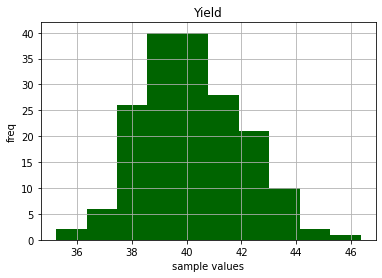

In [34]:
# producing a histogram from the col of interest
# in this case, it is bio-mat-8
import matplotlib.pyplot as plt
df_numeric.hist(col_focus, color = 'darkgreen')
plt.xlabel('sample values')
plt.ylabel('freq')
plt.title(col_focus)



#### Task 7
##### Using the qqplot function, test if the selected variable is normally distributed.
##### What can you conclude about the distribution of this variable?
#### Result:


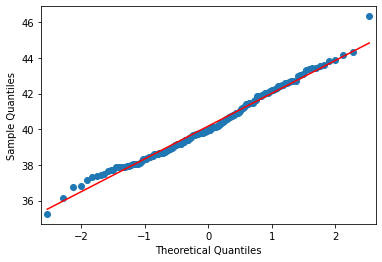

In [35]:
# using statsmodels and pylab to get a qqplot to analyze the histogram's normal distribution
import statsmodels.api as sm
import pylab as py

sm.qqplot(df_numeric[col_focus], line = 's')
py.show()

#### Task 8
##### Let's try to prove the Central Limit Theorem. The following code creates 1000 samples, each of size 50, computes their mean and stores it in a dataframe sample_means.
##### Create histogram using sample_means dataframe with darkblue color. Label x axis as Sample Means, y axis as Frequency and add title as Histogram of Sample Means


In [36]:
# working with CLT to develop a average with random samplings of data from the dataset

sample_means = pd.DataFrame(columns = ['sample_mean'])

sample_count = 1000

samples = []
for x in range(sample_count):
    samples.append(df_numeric[col_focus].sample(50).mean())

sample_means['sample_mean'] = samples
sample_means

,sample_mean
0,40.0630
1,40.3366
2,40.0270
3,39.9126
4,39.9298
...,...
995,40.3896
996,39.5760
997,40.5268
998,40.1772


#### Result:


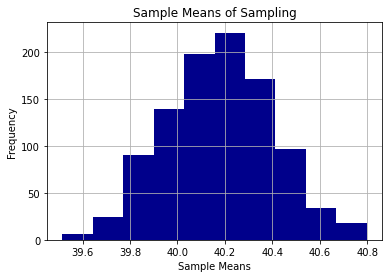

In [37]:
# producing a histogram to analyze the distribution 
sample_means.hist(color = 'darkblue')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.title('Sample Means of Sampling')
plt.show()

#### Task 9
##### According to the Central Limit Theorem, our sample means should have a mean equal to the true population mean and standard deviation equal to the population standard deviation / square root of the size of each sample.
##### Check the validity of both of these claims by calculating the mean and standard deviation of sample_means.
#### Result:


In [38]:
# Evaluation the mean and stdev of the data

sample_mean_value = sample_means['sample_mean'].mean()
sample_popstd_value = sample_means['sample_mean'].std(ddof = 0)

print('mean:',sample_mean_value)
print('population std:', sample_popstd_value)



mean: 40.1794438
population std: 0.22792370135981924


#### Task 10
##### Finally, the CLT claims our sample means should be normally distributed. Check this claim by analyzing the distribution using the qqplot() function.
#### Result:


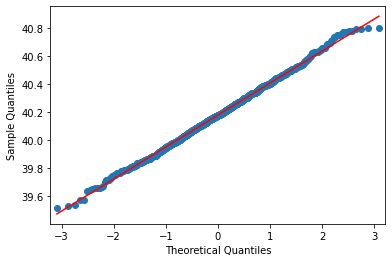

In [39]:
# Using a qq plot to analyze the CLT data
sm.qqplot(sample_means['sample_mean'], line = 's')
py.show()

#### Task 11
##### Calculate the z-score of any observation and save this z-score as z_score.
##### How can you interpret this z-score?
#### Result:




In [40]:
# populating the zscores for the column of interest. If values are less than 0, the value is less than the average
# if the value is greater than 0, the value is greater than the average.
# z-cores are a measure of how many stdevs are away from the mean 
sample_means['z_score'] = (sample_means['sample_mean'] - sample_means['sample_mean'].mean())/sample_means['sample_mean'].std()

sample_means

,sample_mean,z_score
0,40.0630,-0.510634
1,40.3366,0.689167
2,40.0270,-0.668502
3,39.9126,-1.170174
4,39.9298,-1.094748
...,...,...
995,40.3896,0.921585
996,39.5760,-2.646245
997,40.5268,1.523240
998,40.1772,-0.009840


#### Task 12
##### Use the cdf() function to calculate the probability of observing a data point as extreme or greater with reference to the z_score calculated in Task 10. HINT: we care about any observations MORE extreme than this value, so we want a right-hand probability, not a left-hand probability.
##### The z-table calculates left-hand probabilities. So calculate 1 minus the probability on the z-table for the calculated z_score.
#### Result:


In [41]:
# the cumulative distribution function tells us how many points are to the left of the value, or the likelihood of picking a datapoint that is less than the point selected
# by taking the right of this, which is the converse of this, we are finding the likelihood of selecting a point that is greater than the datapoint selected
import scipy.stats as stats

sample_means['right_hand_p'] = (1-stats.norm.cdf(sample_means['z_score']))
sample_means['left_hand_p'] = (stats.norm.cdf(sample_means['z_score']))


In [42]:
sample_means

,sample_mean,z_score,right_hand_p,left_hand_p
0,40.0630,-0.510634,0.695196,0.304804
1,40.3366,0.689167,0.245359,0.754641
2,40.0270,-0.668502,0.748094,0.251906
3,39.9126,-1.170174,0.879034,0.120966
4,39.9298,-1.094748,0.863186,0.136814
...,...,...,...,...
995,40.3896,0.921585,0.178373,0.821627
996,39.5760,-2.646245,0.995930,0.004070
997,40.5268,1.523240,0.063849,0.936151
998,40.1772,-0.009840,0.503925,0.496075
